In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading the file
df=pd.read_csv('height-weight.csv')

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


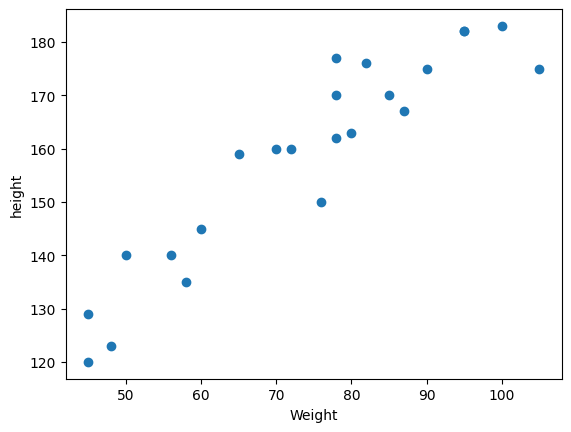

In [9]:
plt.scatter(df.Weight,df.Height)
plt.xlabel("Weight")
plt.ylabel("height")
plt.show()

In [10]:
#prblem statement >> i want to predict height based on the weight
#divde the data into x and y


In [11]:
X=df["Weight"]
y=df["Height"]

In [12]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [13]:
#train test spit
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [27]:
X_train.shape

(17,)

In [28]:
y_train.shape

(17,)

In [29]:
X_test.shape

(6,)

In [32]:
#Scaling is the (optianla)>> standardisation >> fit -tranform ontthe train data and transform on the test data
#if you use fit on the test data ,that is worng you are doing data leakeage
#most of the ml model standard scaler is used as it deal with normal distribution

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
scaler

StandardScaler()

In [52]:
#scaling should b done alwyas after train test split
#target variable should not be scaled
#avoid scaling categorical feature
# scaler.fit_transform(X_train)#for train data used fit
X_train = pd.DataFrame(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test=pd.DataFrame(X_test)
X_test_scaled=scaler.transform(X_test)


In [44]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [53]:
X_train_scaled

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [54]:
#scaling is optioanl becuase it doesnot affect the distribution of the data

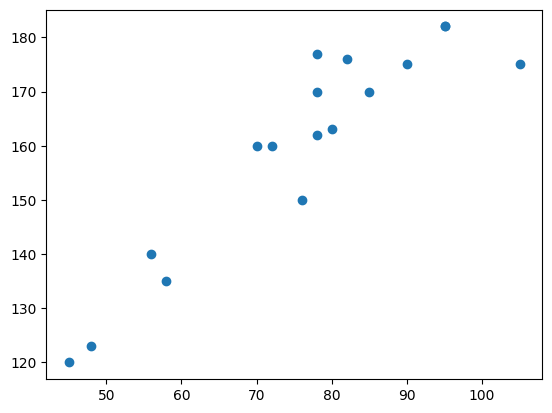

In [55]:
plt.scatter(X_train,y_train)

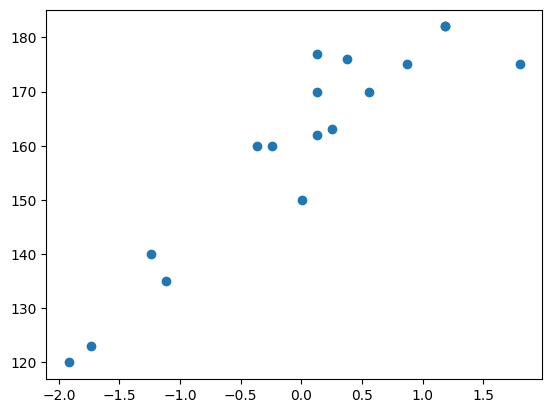

In [56]:
plt.scatter(X_train_scaled,y_train)

In [58]:
#model traing
from sklearn.linear_model import LinearRegression
#Linear Regression parameter
#fit_intercept >> The best fit line will have the intercept,by default it is true
#Copy_X>>copy the original X_train and then buid the model, it will not modify the original data
#n_job>> it will use all the processor
#positive >> When set is true , forces the coff to be true

#fit >> train the model
#predict >> test the model
#after building the model , you have the attributes of the model
#coef_
#incercept


In [59]:
regressor=LinearRegression()

In [60]:
regressor

LinearRegression()

In [61]:
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [62]:
regressor.coef_

array([[17.7307072]])

In [63]:
regressor.intercept_

array([160.])

In [64]:
#prediction on the train data
#interpretatiion of the coef>>one unit increase in the weight , the height is increase by 17.73
#pred height(y)=160+17.73(x)

In [66]:
regressor.predict(X_train_scaled)

array([[166.65863288],
       [153.47066096],
       [129.29271243],
       [160.06464692],
       [164.46063756],
       [175.45061417],
       [140.28268904],
       [169.95562586],
       [125.99571945],
       [162.26264224],
       [155.66865628],
       [138.08469371],
       [162.26264224],
       [180.94560247],
       [191.93557907],
       [180.94560247],
       [162.26264224]])

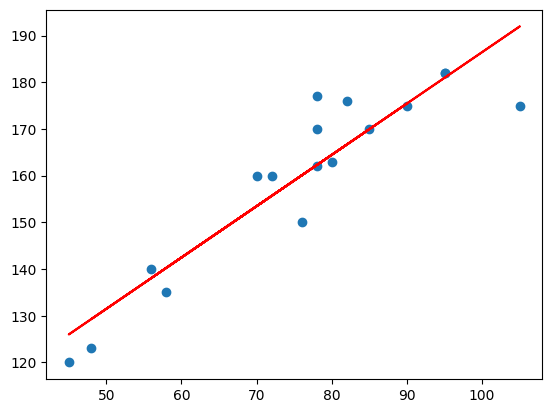

In [67]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train_scaled),color='red')

In [71]:
regressor.predict(X_test_scaled)

array([[125.99571945],
       [147.97567266],
       [142.48068436],
       [186.44059077],
       [172.15362118],
       [131.49070775]])

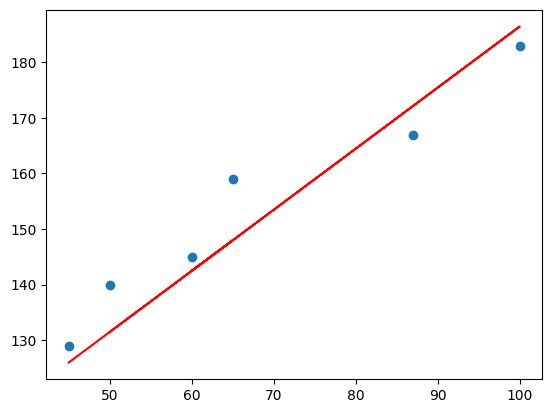

In [86]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test_scaled),color='red')

In [88]:
#Performance metrices
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)


In [93]:
mae

5.608571289304838

In [94]:
mean_squared_error=mean_squared_error(y_test,regressor.predict(X_test_scaled))

In [95]:
mean_squared_error

41.285662830455514

In [98]:
rsq=r2_score(y_test,regressor.predict(X_test_scaled))

In [97]:
#adjusted rsquare
#R2=[1-(1-r2square)*(n-1)/n-k-1] nis no of the observation , and k is predictable varible

In [104]:
1-(1-rsq)*(len(y_test)-1)/(len(y_test)-y_test.shape[1]-1)

0.8401295217820757

In [103]:
rsq

0.8721036174256606

In [106]:
#assumption
#X-y should have the linear relationship
#observation should have no relation
#error should have the constant variasion
#error should be noramlly distributed
#featurre among themself should be least related

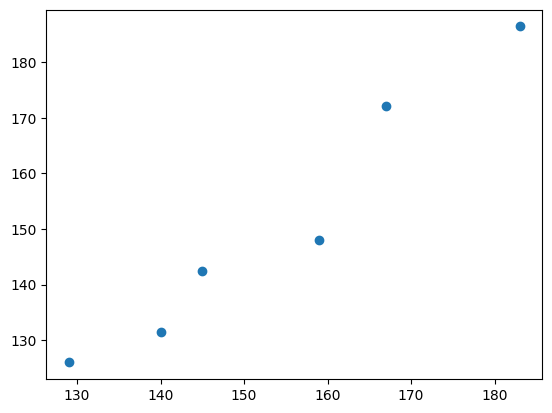

In [107]:
plt.scatter(y_test,y_pred)

In [108]:
#error should have the constant variasion
#error should be noramlly distributed
error=y_test-y_pred

In [109]:
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


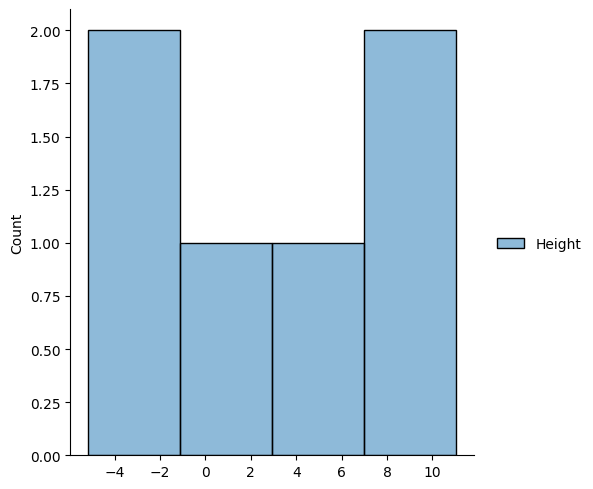

In [111]:
import seaborn as sns
sns.displot(error)